In [2]:
import os

import gzip
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
f = gzip.GzipFile(r"../../Data/rBergomiTrainSet.txt.gz", "r")
dat=np.load(f)
xx=dat[:,:4]
yy=dat[:,4:]
strikes=np.array([0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5 ])
maturities=np.array([0.1,0.3,0.6,0.9,1.2,1.5,1.8,2.0 ])

print(xx.shape)
print(yy.shape)

(40000, 4)
(40000, 88)


In [3]:
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


x_train, x_test, y_train, y_test = train_test_split(
    xx, yy, test_size=0.15, random_state=42)
scale_x = StandardScaler()
scale_y=  StandardScaler()

def xtransform(x_train, x_test):
    return [scale_x.fit_transform(x_train),scale_x.transform(x_test)]

def xinversetransform(x):
    return scale_x.inverse_transform(x)

def ytransform(y_train,y_test):
    return [scale_y.fit_transform(y_train),scale_y.transform(y_test)]

def yinversetransform(y):
    return scale_y.inverse_transform(y)

# Upper and lower bounds used in the training set
ub=np.array([0.16,4,-0.1,0.5])
lb=np.array([0.01,0.3,-0.95,0.025])

def myscale(x):
    return (x - (ub+lb)*0.5)*2/(ub-lb)
def myinverse(x):
    return x*(ub-lb)*0.5+(ub+lb)*0.5

x_train_transform = myscale(x_train)
x_test_transform = myscale(x_test)
[y_train_transform,y_test_transform] = ytransform(y_train,y_test)

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(f"device is {device}")

train_dataset = torch.utils.data.TensorDataset(torch.from_numpy(x_train_transform).to(device=device),
                                               torch.from_numpy(y_train_transform).to(device=device))
test_dataset = torch.utils.data.TensorDataset(torch.from_numpy(x_test_transform).to(device=device),
                                              torch.from_numpy(y_test_transform).to(device=device))


train_data = (torch.from_numpy(x_train_transform).to(device=device),torch.from_numpy(y_train_transform).to(device=device))
test_data = (torch.from_numpy(x_test_transform).to(device=device),torch.from_numpy(y_test_transform).to(device=device))

data_loader = torch.utils.data.DataLoader(train_dataset,batch_size =32,shuffle=True)

device is cuda


In [4]:
import sys
sys.path.append('../../')  # Add the parent directory to the Python path

from torch_NN.nn import ResNN_pricing

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

hyperparas = {'input_dim':4,'hidden_dim':64,'hidden_nums':5,'output_dim':88,'block_layer_nums':2}

model = ResNN_pricing(hyperparas=hyperparas).to(device=device,dtype=torch.float64)

loss_MSE = nn.MSELoss()
optim_Adam = torch.optim.Adam(model.parameters(),lr= 0.0001)

-----------------------Epoch: 0----------------------------------
Batch: 0,train loss is: 2.479579630142014
test loss is 2.5006100227716344
Batch: 100,train loss is: 0.7654600320923312
test loss is 0.8873808387246271
Batch: 200,train loss is: 0.5078085495038206
test loss is 0.4556477991988053
Batch: 300,train loss is: 0.24634458443525414
test loss is 0.2508927324342506
Batch: 400,train loss is: 0.16641949801244413
test loss is 0.15881468937410545
Batch: 500,train loss is: 0.11628806017525302
test loss is 0.10673867852711172
Batch: 600,train loss is: 0.07106604109478519
test loss is 0.07590935458185648
Batch: 700,train loss is: 0.058439503991174875
test loss is 0.05764503931471144
Batch: 800,train loss is: 0.060693470653068585
test loss is 0.04624698260784224
Batch: 900,train loss is: 0.04174536991089091
test loss is 0.03852755461893099
Batch: 1000,train loss is: 0.032552354261141066
test loss is 0.033026510836695666
-----------------------Epoch: 1----------------------------------
Batc

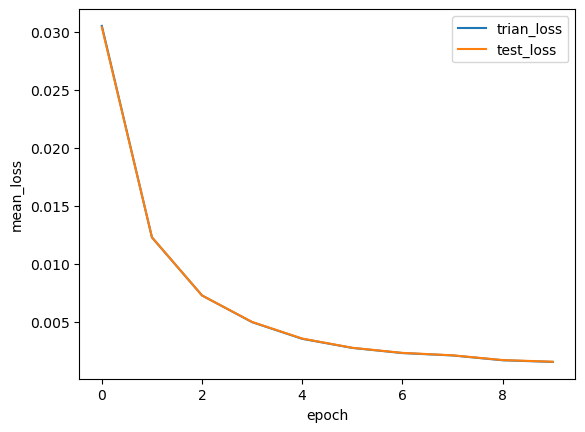

In [5]:
from torch_NN.train import train_model

train_model(loss_MSE,optim_Adam,model,data_loader,train_data,test_data,10)

-----------------------Epoch: 0----------------------------------
Batch: 0,train loss is: 0.0011861851963432687
test loss is 0.004484448363173538
Batch: 100,train loss is: 0.0014567337508953509
test loss is 0.0015750381876083231
Batch: 200,train loss is: 0.0014229525062531083
test loss is 0.0014318163657238946
Batch: 300,train loss is: 0.0017763901738783148
test loss is 0.0014404793476003254
Batch: 400,train loss is: 0.001955563382511046
test loss is 0.0015946283971249818
Batch: 500,train loss is: 0.0011360108353694052
test loss is 0.0015226275378763137
Batch: 600,train loss is: 0.0014143169135305866
test loss is 0.0013842667887442976
Batch: 700,train loss is: 0.001451360769583141
test loss is 0.0014198022325660686
Batch: 800,train loss is: 0.001366513069881201
test loss is 0.0014168301453720091
Batch: 900,train loss is: 0.0013123679990317222
test loss is 0.0013530966416045891
Batch: 1000,train loss is: 0.0012990800092972264
test loss is 0.0014694590572784175
-----------------------Epo

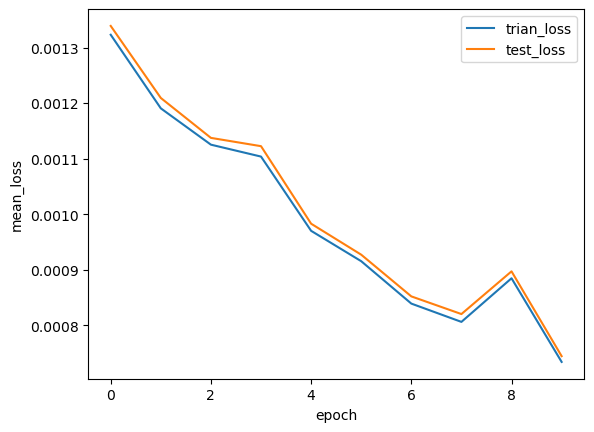

In [6]:
optim_Adam = torch.optim.Adam(model.parameters(),lr= 0.0001)

train_model(loss_MSE,optim_Adam,model,data_loader,train_data,test_data,10)

-----------------------Epoch: 0----------------------------------
Batch: 0,train loss is: 0.000697171342512708
test loss is 0.0007176309647195185
Batch: 100,train loss is: 0.0005993361764576934
test loss is 0.0006567907062477113
Batch: 200,train loss is: 0.0006355456019086762
test loss is 0.0006565621977581218
Batch: 300,train loss is: 0.0005743825726054078
test loss is 0.0006557753156004614
Batch: 400,train loss is: 0.0005463628215683144
test loss is 0.0006529690374328226
Batch: 500,train loss is: 0.000587250454949242
test loss is 0.0006538484270950265
Batch: 600,train loss is: 0.0007079302282450644
test loss is 0.0006522722290330256
Batch: 700,train loss is: 0.0006359674584571336
test loss is 0.0006516566934011834
Batch: 800,train loss is: 0.0005076606383124344
test loss is 0.000651179432539844
Batch: 900,train loss is: 0.0007116573858126284
test loss is 0.0006478085810850133
Batch: 1000,train loss is: 0.0007701324182598063
test loss is 0.0006498519833208065
-----------------------Ep

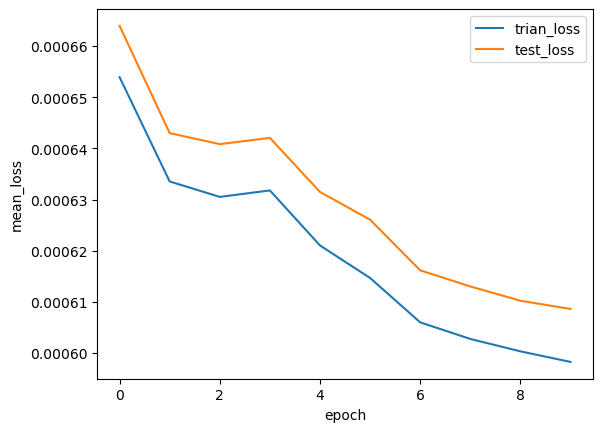

In [7]:
optim_Adam = torch.optim.Adam(model.parameters(),lr= 0.00001)

train_model(loss_MSE,optim_Adam,model,data_loader,train_data,test_data,10)

In [8]:
torch.save(model.state_dict(),'../../Data/YU/rflatBergomi_simple.pth')